[View in Colaboratory](https://colab.research.google.com/github/stalkingwolf04/LEED_research/blob/master/Image_analysis.ipynb)

In [0]:
!pip install --upgrade -q gspread
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

worksheet = gc.open('New camera image data').sheet1



In [2]:
##########################################################
#electron energies
electron_energy = np.zeros(16)
electron_energy_cells = worksheet.range('B2:B17')  #create list of cells
for x in range(0,16):                              #convert list of cells to list of cell values  
  electron_energy[x] = float(electron_energy_cells[x].value)
#print(electron_energy[0:3])

#opening in AU
opening_AU = np.zeros(16)
for y in range(0,16):
  opening_AU[y] = float(np.array(worksheet.range('C2:C17')[y].value))
#  print(opening_AU[y], y, float(np.array(worksheet.range('C2:C17')[y].value)))     
#print(opening_AU)

opening_AU_best = np.mean(opening_AU)
print(opening_AU_best)

0.9803124999999999


In [3]:
### uncertainty in opening_AU ###
# given by standard deviation in opening measurements
error_opening_AU = np.std(opening_AU)
print(error_opening_AU)

0.011520192869479235


In [0]:
### different way of reading in data? ###
####################################################
# import worksheet section as 1d array/list
# call sections of list as columns of 2d array
# 
# h_data = np.zeros((6,8))
# H_data_cells = np.array(worksheet.range('G2:M17'))
# print(H_data_cells)
# y = 0
# x = 0
# while y <= 8:
#   for x in range(0,6):
#     h_data[x,y] = float(H_data_cells[x].value)
#     y += 1
#   for x in range(7,13):
#     h_data[x,y] = float(H_data_cells[x].value)
#   for x in range(14,20):
#     h_data[x,y] = float(H_data_cells[x].value)
  


In [0]:
## Reads in data from spreadsheet as a 2D numpy array
## Horizontal (first half - colab doesn't want to read in more than 4 columns at a time)

y = 0
H_data = np.zeros((6,16))
for y in range(0,16):
  H_data[0,y] = float(np.array(worksheet.range('G2:G17'))[y].value)
  H_data[1,y] = float(np.array(worksheet.range('H2:H17'))[y].value)
  H_data[2,y] = float(np.array(worksheet.range('I2:I17'))[y].value)
  

In [0]:
## Horizontal second half

y = 0
for y in range(0,16):
  H_data[3,y] = float(np.array(worksheet.range('K2:K17'))[y].value)
  H_data[4,y] = float(np.array(worksheet.range('L2:L17'))[y].value)
  H_data[5,y] = float(np.array(worksheet.range('M2:M17'))[y].value)
  
#print(H_data)

In [0]:
## Vertical first half
y = 0
V_data = np.zeros((6,16))
for y in range(0,16):
  V_data[0,y] = float(np.array(worksheet.range('R2:R17'))[y].value)
  V_data[1,y] = float(np.array(worksheet.range('S2:S17'))[y].value)
  V_data[2,y] = float(np.array(worksheet.range('T2:T17'))[y].value)
  

In [0]:
## Vertical second half

y = 0
for y in range(0,16):
  V_data[3,y] = float(np.array(worksheet.range('V2:V17'))[y].value)
  V_data[4,y] = float(np.array(worksheet.range('W2:W17'))[y].value)
  V_data[5,y] = float(np.array(worksheet.range('X2:X17'))[y].value)
#print(V_data)

In [0]:
## Diagonal first half
y = 0
D_data = np.zeros((6,16))
for y in range(0,16):
  D_data[0,y] = float(np.array(worksheet.range('AC2:AC17'))[y].value)
  D_data[1,y] = float(np.array(worksheet.range('AD2:AD17'))[y].value)
  D_data[2,y] = float(np.array(worksheet.range('AE2:AE17'))[y].value)
 

In [0]:
## Diagonal second half
y = 0
for y in range(0,16):
  D_data[3,y] = float(np.array(worksheet.range('AG2:AG17'))[y].value)
  D_data[4,y] = float(np.array(worksheet.range('AH2:AH17'))[y].value)
  D_data[5,y] = float(np.array(worksheet.range('AI2:AI17'))[y].value)
  
#print(D_data)

In [82]:
# print(D_data[0],D_data[3])
# for y in range(0,16):
#   print(float(np.array(worksheet.range('AC2:AC17'))[y].value))
  

[0.0414 0.029  0.0299 0.044  0.0243 0.0182 0.0191 0.0222 0.0279 0.0217
 0.0243 0.0253 0.0273 0.0214 0.022  0.0323] [0.856 0.807 0.782 0.771 0.717 0.345 0.349 0.34  0.33  0.318 0.315 0.312
 0.306 0.292 0.288 0.292]


In [0]:
### 2D Data Array format ###
#
#[        0         |      1        |       2        |         3         |      4        |       5        ]
#[left peak position|half max 1 left|half max 1 right|right peak position|half max 2 left|half max 2 right]
#


In [0]:
##### Opening width calcuations ####

### Horizontal Calculations ###
#Horizontal spacing in AU
H_spacing_AU = H_data[3] - H_data[0]
#Horiz. fractional uncertainty in AU
H_frac_error = .5*(H_data[2] - H_data[2]) + .5*(H_data[5] - H_data[4])/opening_AU_best
#Horiz. opening in reciprocal space
H_opening_recip = 3.493569812*(opening_AU_best/H_spacing_AU)
#Horiz. uncertainty in recip.
H_error_recip = H_frac_error*H_opening_recip

### Vertical Calculations ###
#Vertical spacing in AU
V_spacing_AU = V_data[3] - V_data[0]
#Vert. uncertainty in AU
V_frac_error = .5*(V_data[2] - V_data[2]) + .5*(V_data[5] - V_data[4])/opening_AU_best
#Vert. opening in reciprocal space
V_opening_recip = 3.493569812*(opening_AU_best/V_spacing_AU)
#Vert. uncertainty in recip.
V_error_recip = V_frac_error*V_opening_recip

### Diagonal calculations ###
#Diagonal spacing in AU
D_spacing_AU = D_data[3] - D_data[0]
#fix first 4 data points
D_spacing_AU[:5] = D_spacing_AU[:5]/2

#Diag. uncertainty in AU
D_frac_error = .5*(D_data[2] - D_data[2]) + .5*(D_data[5] - D_data[4])/opening_AU_best
#Diag. opening in reciprocal space
D_opening_recip = 2.470326905*(opening_AU_best/D_spacing_AU)
#Diag. uncertainty in recip.
D_error_recip = D_frac_error*D_opening_recip


In [163]:

# print(D_spacing_AU)
# print(D_spacing_AU[0:7],D_opening_recip[0:7])

[0.4073  0.389   0.37605 0.3635  0.34635 0.3253  0.3283  0.3178  0.3021
 0.2963  0.2907  0.2867  0.2787  0.2706  0.266   0.2597 ]


In [0]:
# H_spacing_AU[5:7] = [.4696,.4689]
# V_spacing_AU[5:7] = [.4659,.4596]
# D_spacing_AU[5:7] = [.3253,.3283]

In [25]:
### now its time to fit a line! ###
#calculate sqrt(energy)
sqrt_E = np.sqrt(electron_energy)
# for x in range(0,16):
#   print(sqrt_E[x],V_opening_recip[x],V_error_recip[x])


### line fitting with uncertainty ###
# least squares fitting
# delta = 16*np.sum(electron_energy) - np.square(np.sum(sqrt_E))
#[?] Horizontal
# H_y_int = (np.sum(electron_energy)*np.sum(H_opening_recip) - np.sum(sqrt_E)np.sum(sqrt_E*H_opening_recip))/delta
# H_slope = (16*np.sum(sqrt_E*H_opening_recip)-np.sum(sqrt_E)*np.sum(H_opening_recip))/delta
#[?] V
# V_y_int = np.sum(electron_energy)*np.sum(V_opening_recip) - np.sum(sqrt_E)np.sum(sqrt_E*V_opening_recip))/delta
# V_slope = (16*np.sum(sqrt_E*V_opening_recip)-np.sum(sqrt_E)*np.sum(V_opening_recip))/delta
#[?] D
# D_y_int = np.sum(electron_energy)*np.sum(D_opening_recip) - np.sum(sqrt_E)np.sum(sqrt_E*D_opening_recip))/delta
# D_slope = (16*np.sum(sqrt_E*D_opening_recip)-np.sum(sqrt_E)*np.sum(D_opening_recip))/delta


## Turns out there's a function in numpy that can do this for me... ###
A1 = np.vstack([sqrt_E, np.ones(len(sqrt_E))]).T
m1, c1 = np.linalg.lstsq(A1, H_opening_recip, rcond=None)[0]
print('Horizontal fit Slope and intercept:', m1, c1)

A2 = np.vstack([sqrt_E, np.ones(len(sqrt_E))]).T
m2, c2 = np.linalg.lstsq(A2, V_opening_recip, rcond=None)[0]
print('Vertical fit Slope and intercept:  ', m2, c2)

A3 = np.vstack([sqrt_E, np.ones(len(sqrt_E))]).T
m3, c3 = np.linalg.lstsq(A3, D_opening_recip, rcond=None)[0]
print('Diagonal fit Slope and intercept:  ', m3, c3)


Horizontal fit Slope and intercept: 0.8146619672009915 0.10644788675304392
Vertical fit Slope and intercept:   0.8135237313365363 0.18554903579603252
Diagonal fit Slope and intercept:   0.8231972476660858 0.07611820008056891


In [35]:
###uncertainty in line fit
delta = 16*np.sum(electron_energy) - np.square(np.sum(sqrt_E))
#[?] Horizontal
H_fit_error = np.sqrt((1/16)*np.sum(np.square(H_opening_recip - c1 - m1*sqrt_E)))
m1_error = H_fit_error*np.sqrt(16/delta)
c1_error = H_fit_error*np.sqrt(np.sum(electron_energy)/delta)
#[?] V
V_fit_error = np.sqrt((1/16)*np.sum(np.square(V_opening_recip - c2 - m2*sqrt_E)))
m2_error = V_fit_error*np.sqrt(16/delta)
c2_error = V_fit_error*np.sqrt(np.sum(electron_energy)/delta)
#[?] D
D_fit_error = np.sqrt((1/16)*np.sum(np.square(D_opening_recip - c3 - m3*sqrt_E)))
m3_error = D_fit_error*np.sqrt(16/delta)
c3_error = D_fit_error*np.sqrt(np.sum(electron_energy)/delta)

print('Uncertainty in H calculated opening:', H_fit_error, '   Uncertainty in H fit slope:', m1_error, ' Intercept:', c1_error)
print('Uncertainty in V calculated opening:', V_fit_error, '    Uncertainty in V fit slope:', m1_error, ' Intercept:', c1_error)
print('Uncertainty in D calculated opening:', D_fit_error, '    Uncertainty in D fit slope:', m1_error, ' Intercept:', c1_error)


Uncertainty in H calculated opening: 0.053874216437033315    Uncertainty in H fit slope: 0.010765974663537157  Intercept: 0.10099379446342886
Uncertainty in V calculated opening: 0.05001335918926997     Uncertainty in V fit slope: 0.010765974663537157  Intercept: 0.10099379446342886
Uncertainty in D calculated opening: 0.07293351977844696     Uncertainty in D fit slope: 0.010765974663537157  Intercept: 0.10099379446342886


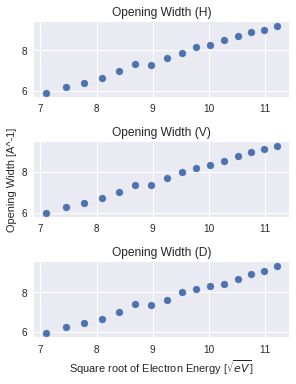

In [22]:
### Plotting ###
# want a figure with 3 individual scatter plots

# top (H)
plt.subplot(3,2,1)
plt.scatter(sqrt_E, H_opening_recip)
plt.title('Opening Width (H)')
# plt.ylabel('Opening Width [A^-1]')
# plt.xlabel('Square root of Electron Energy [$\sqrt{eV}$]')

# middle (V)
plt.subplot(3,2,3)
plt.scatter(sqrt_E, V_opening_recip)
plt.title('Opening Width (V)')
plt.ylabel('Opening Width [A^-1]')
# plt.xlabel('Square root of Electron Energy [$\sqrt{eV}$]')

# bottom (D)
plt.subplot(3,2,5)
plt.scatter(sqrt_E, D_opening_recip)
plt.title('Opening Width (D)')
# plt.ylabel('Opening Width [A^-1]')
plt.xlabel('Square root of Electron Energy [$\sqrt{eV}$]')


plt.tight_layout()

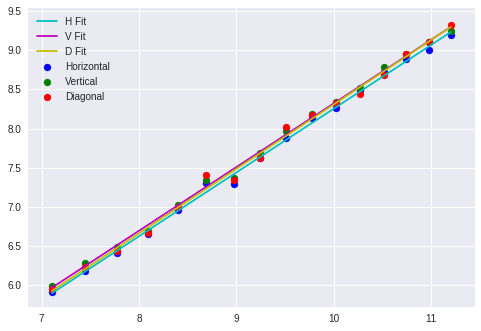

In [24]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(sqrt_E, H_opening_recip, c='b', label='Horizontal')
ax1.scatter(sqrt_E, V_opening_recip, c='g', label='Vertical')
ax1.scatter(sqrt_E, D_opening_recip, c='r', label='Diagonal')
ax1.plot(sqrt_E, m1*sqrt_E + c1, c='c', label='H Fit')
ax1.plot(sqrt_E, m2*sqrt_E + c2, c='m', label='V Fit')
ax1.plot(sqrt_E, m3*sqrt_E + c3, c='y', label='D Fit')
plt.legend(loc='upper left')
plt.show()